In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
host = "ao"
sample = "SRR9224487"
species = "Bacteroides_ovatus"

In [5]:
file = "/u/scratch/r/rwolff/Poyet_midas_output/midas_files/%s/%s/snps/output/%s.snps.gz" % (host,sample,species)
reader = pd.read_csv(file, iterator=True,sep="\t")

In [6]:
r=reader.get_chunk(6000000)

In [7]:
df=r[r.columns[-4:]]

In [8]:
df_x = df.loc[df.T.sum() > 40]

In [9]:
y=df_x.T.max()/df_x.T.sum()

In [10]:
pi=((y.values)*(1-y.values)).mean()

In [11]:
pi

0.00038622169625989535

In [12]:
logbins = np.logspace(-4,0,30)
logbins = np.insert(logbins,0,0)

Text(0, 0.5, 'Density')

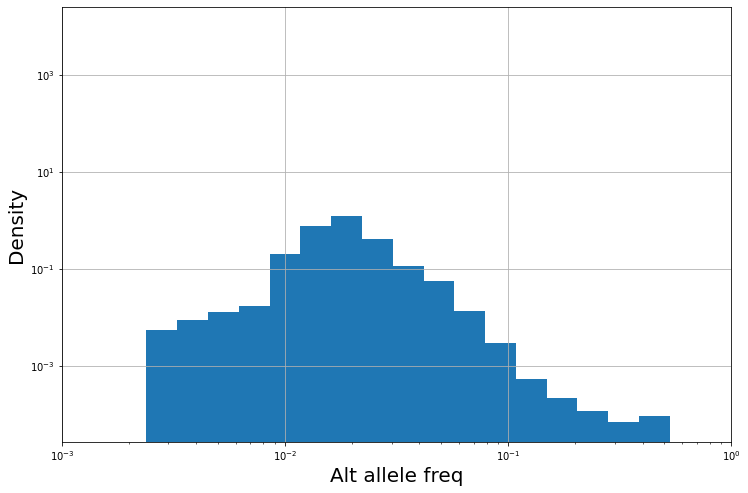

In [13]:
fig,ax = plt.subplots(figsize=(12,8))
ax.hist(1-y[y>0].values,bins=logbins,density=True);
#ax.hist(1-y[y>0].values,bins=np.linspace(0,1,30),density=True);

ax.grid(True)

ax.semilogx();
ax.semilogy()
#ax.set_ylim(1e-2,1e0)
ax.set_xlim([1e-3,1e0]);

ax.set_xlabel("Alt allele freq",size=20)
ax.set_ylabel("Density",size=20)

In [14]:
file = "/u/scratch/r/rwolff/Poyet_midas_output/midas_files/%s/%s/genes/output/%s.genes.gz" % (host,sample,species)
reader = pd.read_csv(file, iterator=True,sep="\t")

In [15]:
g=reader.get_chunk(100000)

[]

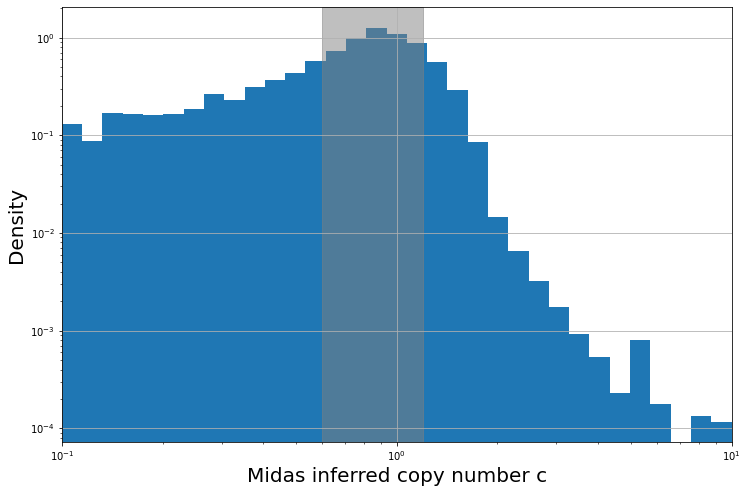

In [16]:
fig,ax = plt.subplots(figsize=(12,8))
ax.hist(g["copy_number"],bins=np.logspace(-5,1,100),density=True);
ax.grid(True)

ax.axvspan(0.6, 1.2, alpha=0.5, color='grey')

ax.set_xlim([1e-1,1e1])

ax.set_xlabel("Midas inferred copy number c",size=20)
ax.set_ylabel("Density",size=20)
ax.semilogx()
ax.semilogy()